## PMOD ADC Reading Waveforms

This demonstration shows how to use the PmodAD2. 

The PmodAD2, and an analog signal generator are required for this demonstration. 

In this demonstration, an analog waveform is generated using the Digilent Analog Discovery 2, and the Waveforms software.:

1. [Digilent Analog Discovery 2](http://store.digilentinc.com/analog-discovery-2-100msps-usb-oscilloscope-logic-analyzer-and-variable-power-supply/)

<tr>
<td> <img src=http://cdn6.bigcommerce.com/s-7gavg/products/468/images/2617/Analog_Discovery_2_obl_Academic_600__01249.1447804398.1280.1280.png alt="Drawing" style="width: 250px;"/> </td>
</tr>

2. [WaveForms 2015](https://reference.digilentinc.com/waveforms3#newest):

<tr>
<td> <img src=http://cdn6.bigcommerce.com/s-7gavg/products/481/images/2623/TILE_WaveForms2015_150__84968.1447878611.1280.1280.png alt="Drawing" style="width: 250px;"/> </td>
<td> <img src=http://cdn6.bigcommerce.com/s-7gavg/products/481/images/3961/img.07.0__38949.1458772469.1280.1280.png alt="Drawing" style="width: 250px;"/> </td>
</tr>

For the waveform to be displayed, we collect multiple points in each period. However, according to the Nyquist theorem, the sample rate only has to be $2\times$ the frequency of the signal.

The following block of code is just an example. For the PMOD ADC, the minimum delay between two samples is around $0.3\,$ms (corresponding to a sampling period of $3\,$kHz). So the maximum frequency of the input signal can be $1.5\,$kHz.

Type in the PMOD ID of the ADC (1 ~ 4): 4
Type in the frequency/Hz of the waveform: 200


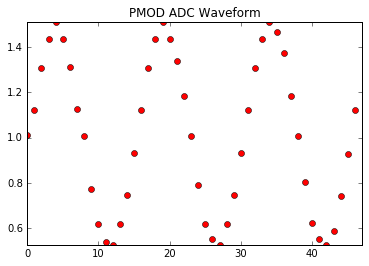

In [1]:
from time import sleep
from pynq import Overlay
from pynq.pmods import PMOD_ADC
from pynq.pmods import PMOD_DAC
from pynq.pmods import PMOD_OLED

ol = Overlay("pmod.bit")
ol.download()
adc_id = int(input("Type in the PMOD ID of the ADC (1 ~ 4): "))
adc = PMOD_ADC(adc_id)
freq = int(input("Type in the frequency/Hz of the waveform: "))
period = 1/freq
log_interval_us = 0

# Assume Channel 0 is connected to the waveform generator
adc.start_log(1,0,0,log_interval_us)
sleep(3*period)
log = adc.get_log()

# Draw the figure
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(len(log)), log, 'ro')
plt.title('PMOD ADC Waveform')
plt.axis([0, len(log), min(log), max(log)])
plt.show()

adc.reset()
del adc,ol